In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# Defining the data directories
train_dir = 'C:/Users/Shahd/Desktop/dataset/Training/'
test_dir = 'C:/Users/Shahd/Desktop/dataset/Testing/'

In [46]:
# Defining the data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # Resizing the images to 150x150 pixels
    batch_size=32,
    class_mode='categorical' # categorical cross-entropy as loss function
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 4255 images belonging to 3 classes.
Found 1011 images belonging to 3 classes.


In [48]:
# Defining the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [3]:
# Training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)



Epoch 1/10
133/133 [==============================] - 122s 914ms/step - loss: 0.5979 - accuracy: 0.7182 - val_loss: 0.4696 - val_accuracy: 0.7784
Epoch 2/10
133/133 [==============================] - 117s 883ms/step - loss: 0.3627 - accuracy: 0.8597 - val_loss: 0.3588 - val_accuracy: 0.8457
Epoch 3/10
133/133 [==============================] - 123s 921ms/step - loss: 0.2412 - accuracy: 0.9152 - val_loss: 0.3137 - val_accuracy: 0.8605
Epoch 4/10
133/133 [==============================] - 114s 860ms/step - loss: 0.1934 - accuracy: 0.9290 - val_loss: 0.2758 - val_accuracy: 0.8724
Epoch 5/10
133/133 [==============================] - 118s 886ms/step - loss: 0.1440 - accuracy: 0.9467 - val_loss: 0.2328 - val_accuracy: 0.9050
Epoch 6/10
133/133 [==============================] - 116s 873ms/step - loss: 0.1163 - accuracy: 0.9561 - val_loss: 0.1571 - val_accuracy: 0.9515
Epoch 7/10
133/133 [==============================] - 114s 858ms/step - loss: 0.0887 - accuracy: 0.9685 - val_loss: 0.1652 -

In [4]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9624134302139282


In [16]:
#saving the model
from tensorflow import keras
model.save("BrainTumorProject")
model.save_weights("BrainTumorProject.h5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: BrainTumorProject\assets


In [6]:
from tensorflow import keras
my_model = keras.models.load_model('BrainTumorProject')
my_model.load_weights("BrainTumorProject.h5")

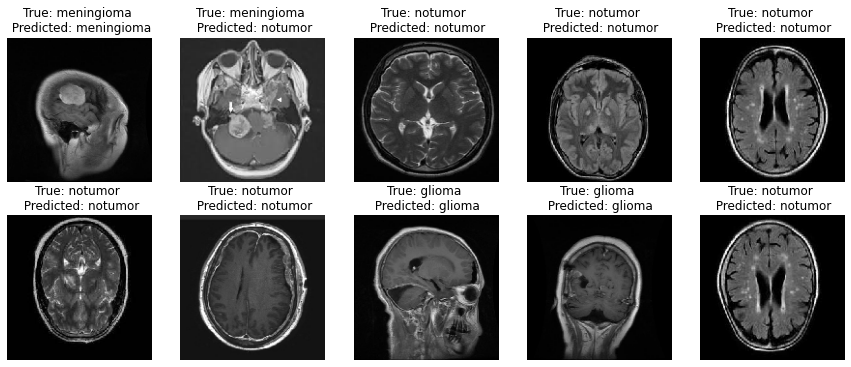

In [12]:
# Getting 10 random images from the test set
images, labels = test_generator.next()
indices = np.random.choice(len(images), 10, replace=False)
images = images[indices]
labels = labels[indices]

# Making predictions on the 10 images
predictions = model.predict(images)

# Decoding the one-hot encoded labels and predictions
label_names = test_generator.class_indices
label_names = dict((v,k) for k,v in label_names.items())
true_labels = [label_names[np.argmax(label)] for label in labels]
predicted_labels = [label_names[np.argmax(pred)] for pred in predictions]

# Displaying the 10 images with their true and predicted labels
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.set(title=f'True: {true_labels[i]} \n Predicted: {predicted_labels[i]}')
    ax.axis('off')

plt.show()

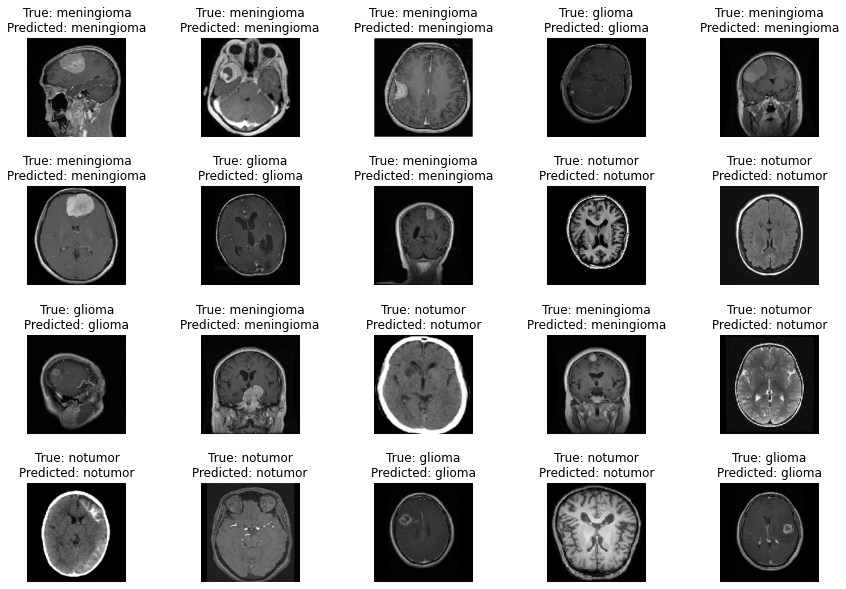

In [15]:
# Getting 20 random images from the test set
images, labels = test_generator.next()
indices = np.random.choice(len(images), 20, replace=False)
images = images[indices]
labels = labels[indices]

predictions = model.predict(images)

label_names = test_generator.class_indices
label_names = dict((v,k) for k,v in label_names.items())
true_labels = [label_names[np.argmax(label)] for label in labels]
predicted_labels = [label_names[np.argmax(pred)] for pred in predictions]

fig, axs = plt.subplots(4, 5, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adding some vertical spacing between rows
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.set(title=f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
    ax.axis('off')

plt.show()